# Decay model of RNA

This notebook profile the decay model of RNA.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ks_2samp, fisher_exact, chi2_contingency

## 1. Schematic of synthesis and decay

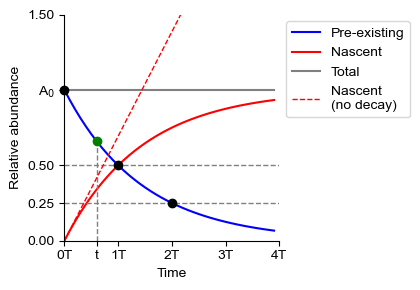

In [2]:
A0 = 1
T = 1
xs = np.arange(0, 4, 0.1)
ys = np.array([A0 * 2** (- x / T) for x in xs])

plt.figure(figsize=(4.3, 3))
plt.plot(xs, ys, color="blue", label="Pre-existing")
plt.plot(xs, 1 - ys, color="red", label="Nascent")
plt.plot(xs, [1] * len(ys), color="grey", label="Total")
plt.scatter([0, 1, 2], [1, 0.5, 0.25], color="black", clip_on=False, zorder=20)
plt.axhline(0.25, lw=1, ls="--", color="grey")
plt.axhline(0.5, lw=1, ls="--", color="grey")

plt.scatter([0.6], ys[6], marker="o", color="green", zorder=20)
plt.plot([0.6, 0.6], [0, ys[6]], ls="--", lw=1, color="grey")

ys1 = [x * A0 * np.log(2) / T for x in xs]
plt.plot(xs, ys1, lw=1, ls="--", color="red", label="Nascent\n(no decay)")

plt.xticks([0, 0.6, 1, 2, 3, 4], ["0T", "t", "1T", "2T", "3T", "4T"])
plt.yticks([0, 0.25, 0.5, 1, 1.5], ["0.00", "0.25", "0.50", "A$_0$", "1.50"])
plt.xlabel("Time")
plt.ylabel("Relative abundance")
plt.gca().spines["top"].set_visible(False)
plt.gca().spines["right"].set_visible(False)
plt.xlim(0, 4)
plt.ylim(0, 1.5)
plt.legend(ncol=1, loc="upper left", bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.savefig("figures/halflife_schematic.pdf")

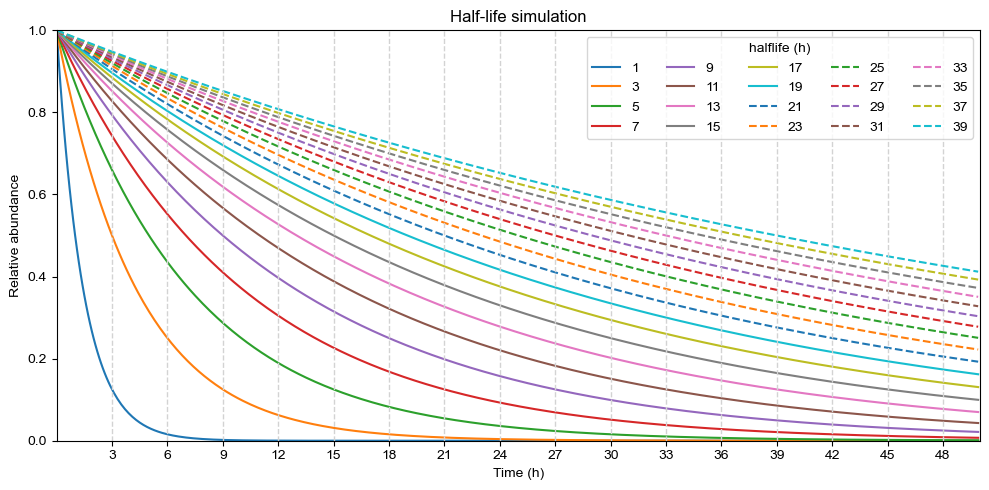

In [3]:
plt.figure(figsize=(10, 5))
plt.title("Half-life simulation")
for T in range(1, 40, 2):
    xs = np.arange(0, 50, 0.1)
    ys = [0.5 ** (x / T) for x in xs]
    plt.plot(xs, ys, label=str(T), ls=["-", "--"][int(T/20)])
xs = list(range(3, 50, 3))
for x in xs:
    plt.axvline(x, color="lightgrey", ls="--", lw=1)
plt.xlim(0, 50)
plt.ylim(0, 1)
plt.legend(ncol=5, title="halflife (h)")
plt.xticks(xs)
plt.xlabel("Time (h)")
plt.ylabel("Relative abundance")
plt.tight_layout()
plt.savefig("figures/halflife_simulation.pdf")

## 2. Relationship between NTR and half-life

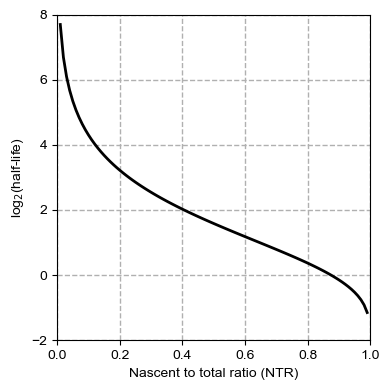

In [4]:
xs = np.arange(0, 1, 0.01)[1:]
ys = np.array([-3/np.log2(1 - x) for x in xs])
ys1 = np.log2(ys)
ys2 = np.arange(-2, 9)

plt.figure(figsize=(4, 4))
plt.plot(xs, ys1, color="black", lw=2)
plt.xlabel("Nascent to total ratio (NTR)")
plt.ylabel("log$_2$(half-life)")
plt.xlim(0, 1)
plt.ylim(-2, 8)
# plt.yticks(ys2, [2**int(y) for y in ys2])
plt.grid(lw=1, ls="--")
plt.tight_layout()
# plt.savefig("ntr_halflife.pdf")
plt.show()

In [5]:
m = [[80, 20], [40, 30]]
print(fisher_exact(m))
print(chi2_contingency(m))

SignificanceResult(statistic=3.0, pvalue=0.0019404959344599244)
Chi2ContingencyResult(statistic=9.290196428571425, pvalue=0.002303834556318016, dof=1, expected_freq=array([[70.58823529, 29.41176471],
       [49.41176471, 20.58823529]]))


In [6]:
ntr1 = 20 / (80 + 20)
T1 = -3 / np.log2(1 - ntr1)
print(ntr1, T1)

ntr2 = 30 / (40 + 30)
T2 = -3 / np.log2(1 - ntr2)
print(ntr2, T2)

np.log2(T2) - np.log2(T1)

0.2 9.318851158516171
0.42857142857142855 3.71583787754


-1.3264645501722656